# 手写字符识别神经网络

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

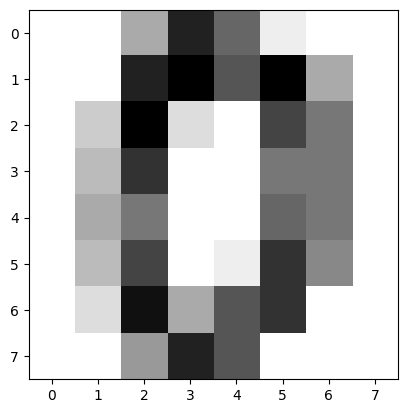

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

image1 = digits.images[0]
plt.imshow(image1, cmap=plt.cm.gray_r)

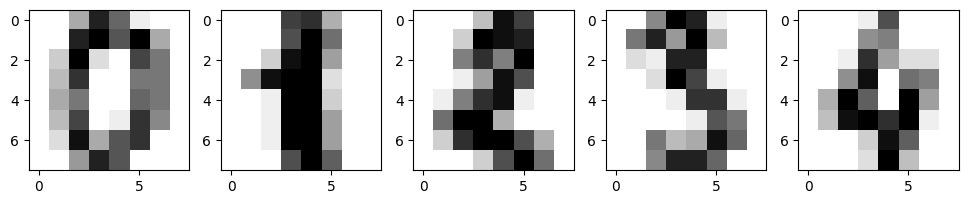

In [3]:
### 代码开始 ### (3～5 行代码)
fig, axes = plt.subplots(1, 5, figsize=(12,4))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)
### 代码结束 ###

In [5]:
### 代码开始 ### (≈ 2 行代码)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=30)
### 代码结束 ###
len(X_train), len(y_train), len(X_test), len(y_test), np.mean(y_test[5:13])

(1437, 1437, 360, 360, np.float64(3.75))

In [6]:
# 使用 MLPClassifier() 构建一个神经网络预测模型
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def mpl():
    """
    参数:无

    返回:
    model -- 人工神经网络模型
    score -- 测试集上的预测准确率
    """
    ### 代码开始 ### (≈ 2 行代码)
    model = MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation='relu',
        solver='sgd',
        learning_rate_init=0.02,
        learning_rate='constant',
        max_iter=100,
        random_state=1
    )

    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    ### 代码结束 ###
    return model, score

In [7]:
mpl()[1]

0.9777777777777777

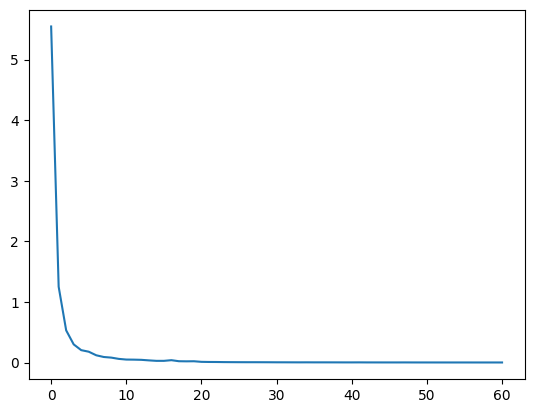

In [8]:
# 绘制损失变化曲线
model = mpl()[0]
plt.plot(model.loss_curve_)

In [9]:
# 输出模型达到收敛的迭代次数
model.n_iter_

61